# 출처:http://allendowney.github.io/ThinkBayes2/chap04.html

Whenever you survey people about sensitive issues, you have to deal with social desirability bias, which is the tendency of people to adjust their answers to show themselves in the most positive light. One way to improve the accuracy of the results is randomized response.

As an example, suppose you want to know how many people cheat on their taxes. If you ask them directly, it is likely that some of the cheaters will lie. You can get a more accurate estimate if you ask them indirectly, like this: Ask each person to flip a coin and, without revealing the outcome,

If they get heads, they report YES.

If they get tails, they honestly answer the question “Do you cheat on your taxes?”

If someone says YES, we don’t know whether they actually cheat on their taxes; they might have flipped heads. Knowing this, people might be more willing to answer honestly.

Suppose you survey 100 people this way and get 80 YESes and 20 NOs. Based on this data, what is the posterior distribution for the fraction of people who cheat on their taxes? What is the most likely quantity in the posterior distribution?

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [2]:
!pip install empiricaldist
from empiricaldist import Pmf

In [3]:
a=1;b=1 #beta(1,1)
hypos=np.linspace(0,1,101)
x=beta.pdf(hypos,a,b)
prior=Pmf(x,hypos)

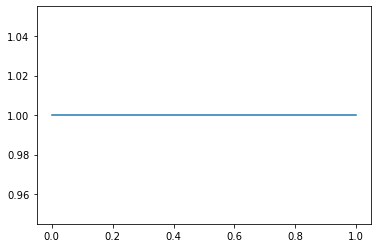

In [4]:
plt.plot(hypos,x) #prior plot

In [5]:
likelihood={'Y':0.5+hypos/2, 'N':(1-hypos)/2} #Q1 WHY?? IS THIS BINOMIAL MODEL?

# Q1 : Likelihood 함수가 이와 같이 나오는 이유를 설명해주세요. 그리고 이와 같은 sampling model은 binomial model인가요? 왜 그런가요?

 Data를 수집할 때 동전던지기를 통해 앞면이 나온 사람은 모두 Yes를 대답하게 했다. 이는 응답자가 거짓말을 하지 않게 하기위해 설정한 조건으로 응답자가 동전의 앞면이 나온 이유로 Yes라고 답했을지, 동전의 뒷면이 나와 진실된 응답으로 Yes라고 답했을지 모르게하기 위함이었다. 
 
 우리가 원하는 데이터는 얻은 데이터 그대로가 아니라 '진실된 응답'이다. 즉 전체 응답의 50%(동전의 앞면 -> Yes)는 사실상 Dummy 응답이므로, Yes 응답 데이터에서 (전체 응답 수 * 0.5)를 뺀 값이 '진실된 Yes 응답'이 될 것이다. No 응답 데이터는 그대로 '진실된 No 응답'일 것이다.
 
 동전의 앞면이 나와 거짓 Yes응답을 하는 경우를 제외한 나머지 응답만을 우리는 Likelihood로 고려했다. 탈세를 할 확률을 Theta라고 하고 각 응답이 모두 i.i.d.한 Bernuoli분포를 따른다고 하면, Likelihood함수는 B(n, Theta)를 따를 것이다. 

In [6]:
dataset='Y'*80+'N'*20 #DATA 80 YES, 20 NO
posterior1=prior.copy()
for data in dataset:
    posterior1 *= likelihood[data]
posterior1.normalize()

3.694513913396701e-21

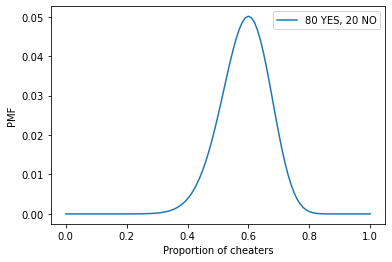

In [7]:
posterior1.plot(label='80 YES, 20 NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend() #Q2 WHY MODE ON 0.6? DATA IS 80 YES & 20 NO. WHY NOT 0.8?

# Q2 : 우리가 구한 Posterior 분포의 꼴이 왜 다음과 같이 나왔을까요? prior의 꼴과 data와 관련하여 설명해주세요. 그리고 data는 YES와 NO의 비율이 4:1인데 왜 posterior의 mode는 0.8이 아니라 0.6인걸까요?

우리는 Prior Dist를 Uniform[0:1](=Beta(1,1))으로 설정했다.
그리고 앞서 Likelihood 함수가 Binomial Dist를 따른다는 것을 알 수 있었다.
Likelihood가 Binomial Dist를 따르고, Prior Dist가 Beta Dist를 따르면 Conjugacy 성질을 이용해 Posterior Dist 또한 Beta Dist를 따른다는 것을 알 수 있다. 
Yes가 80,No가 20이므로 얼핏 보면 4:1인 것 같지만, 실험의 전제조건을 반영한 '진실된 응답'은 Yes가 80-50 = 30, No가 20이다.
Beta(1,1)인 Prior Dist에 30 Yes와 20 No의 Likelihood를 대입하면, Posterior Dist ~ Beta(31,21)이다. 이때 Posterior Dist의 Mode값은 (a-1)/(a+b-2)이므로 30/50 = 0.6이다.

In [8]:
dataset='Y'*800+'N'*200 #DATA 800 YES, 200 NO
posterior2=prior.copy()
for data in dataset:
    posterior2 *= likelihood[data]
posterior2.normalize()

3.019427274584021e-217

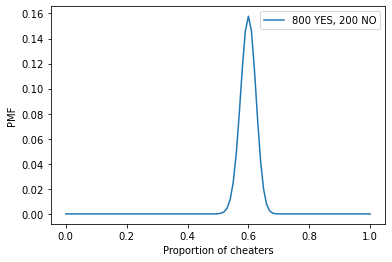

In [9]:
posterior2.plot(label='800 YES, 200 NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend()

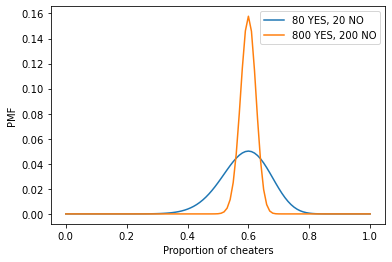

In [10]:
posterior1.plot(label='80 YES, 20 NO')
posterior2.plot(label='800 YES, 200 NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend() #Q3 DIFFERENCE? WHY?

# Q3: 두 posterior 분포는 왜 이렇게 다른 꼴이 나오게 되었을까요?

In [22]:
a = 1; b = 1;
y1 = 30; N1 = 50
y2 = 300; N2 = 500

mean1 = (y1+a)/(a+b+N1)
mean2 = (y2+a)/(a+b+N2)

mode1 = y1/N1; mode2 = y2/N2

var1 = mean1*(1-mean1)/(a+b+N1+1)
var2 = mean2*(1-mean2)/(a+b+N2+1)

print('Posterior Dist1')
print('Mean: {:.4f}, Mode: {:.4f}, Var: {:.4f}'.format(mean1, mode1, var1))
print('Posterior Dist2')
print('Mean: {:.4f}, Mode: {:.4f}, Var: {:.4f}'.format(mean2, mode2, var2))

Posterior Dist1
Mean: 0.5962, Mode: 0.6000, Var: 0.0045
Posterior Dist2
Mean: 0.5996, Mode: 0.6000, Var: 0.0005


두 분포의 차이는 데이터의 수에서 기인한다. 같은 비율의 응답이므로 두 분포는 같은 최빈값을 가지게 된다. 하지만 100개와 1000개(진실된 응답은 50개와 500개)의 데이터 수 차이는 Posterior분포의 분산, 즉 불확실성을 더 감소시켰다. 

# Q4: PRIOR와 DATA를 마음대로 바꿔가며 POSTERIOR 분포가 어떻게 변하는지 실험해보세요.

In [12]:
#Q4 PRIOR와 DATA를 마음대로 바꿔가며 POSTERIOR 분포가 어떻게 변하는지 실험해보세요.
a=10;b=10 #a,b SET YOUR OWN PRIOR beta(a,b)
hypos=np.linspace(0,1,101)
x=beta.pdf(hypos,a,b)
prior=Pmf(x,hypos)

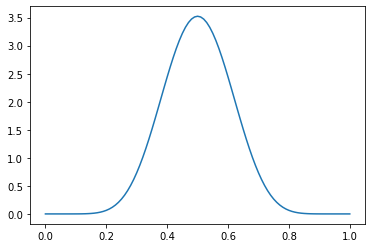

In [13]:
plt.plot(hypos,x) # YOUR OWN PRIOR

In [14]:
dataset='Y'*60 +'N'*40 #GIVE THE DATA
posterior3=prior.copy()
for data in dataset:
    posterior3 *= likelihood[data]
posterior3.normalize()

4.506458028915134e-29

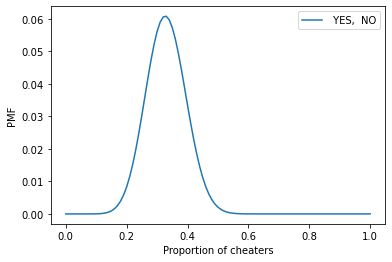

In [15]:
posterior3.plot(label=' YES,  NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend()

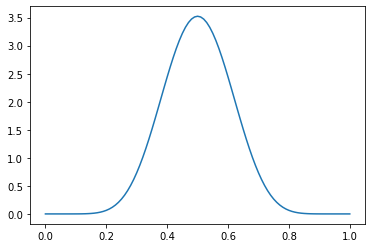

In [17]:
a=10;b=10 #a,b SET YOUR OWN PRIOR 
hypos=np.linspace(0,1,101)
x=beta.pdf(hypos,a,b)
prior=Pmf(x,hypos)
plt.plot(hypos,x) # YOUR OWN PRIOR

In [18]:
dataset='Y'*70 +'N'*30 #GIVE THE DATA
posterior4=prior.copy()
for data in dataset:
    posterior4 *= likelihood[data]
posterior4.normalize()

1.4389489162873632e-25

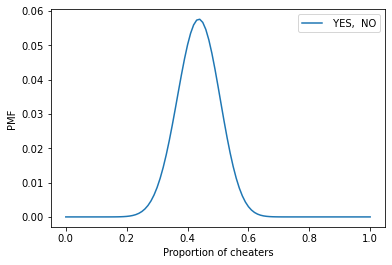

In [19]:
posterior4.plot(label=' YES,  NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend()

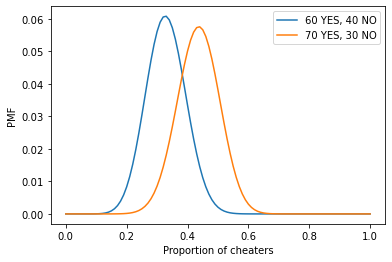

In [21]:
posterior3.plot(label='60 YES, 40 NO')
posterior4.plot(label='70 YES, 30 NO',xlabel='Proportion of cheaters',ylabel='PMF')
plt.legend()

%%%눈치채신 분도 계시겠지만 posterior분포의 밑넓이가 1은 아닙니다. 연속형 확률분포의 prior에 likelihood를 곱한게 아니라 linspace(0,1,101)로 쪼갠 x에 해당하는 pdf(x)값을 prior로 사용했기 때문에 엄밀히 말하면 prior가 분포는 되지 못하죠. 하지만 likelihood와의 곱을 통해 posterior의 꼴을 얻어 여러가지의 prior, data의 경우를 가질 때 posterior의 꼴의 비교를 할 수 있다는 점에 의의를 둬주시면 감사하겠습니다.(이산형으로 표현된 posterior의 꼴이고 normalize가 되었으므로 sum(posterior)는 1이 나오긴 합니당)%%% 

In [16]:
sum(posterior1)

1.0